## Predicting the future price of bulldozers using ML

## 1. Problem Definition

How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

## 2. Data

* The data is downloaded from kaggle bluebook for bulldozers challange.
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

  
## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4. Features

| Variable Name | Description  | Variable Type |
|------|-----|-----|
| SalesID   | unique identifier of a particular sale of a machine at auction  | Independent  variable |
| MachineID  | identifier for a particular machine; machines may have multiple sales  | Independent  variable |
| ModelID | identifier for a unique machine model (i.e. fiModelDesc) | Independent  variable |
| datasource  | source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs. | Independent  variable |
| auctioneerID  | identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource.  | Independent  variable |
| YearMade  | year of manufacturer of the Machine  | Independent  variable |
| MachineHoursCurrentMeter | current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale | Independent  variable |
| UsageBand | value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel; e.g. 'Low' means this machine has fewer hours given its lifespan relative to the average of fiBaseModel. | Independent  variable |
| Saledate   | time of sale | Independent  variable |
| fiModelDesc  | Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor  | Independent  variable |
| State | US State in which sale occurred | Independent  variable |
| Drive_System | machine configuration; typically describes whether 2 or 4 wheel drive  | Independent  variable |
| Enclosure  | machine configuration - does the machine have an enclosed cab or not | Independent  variable |
| Forks  | machine configuration - attachment used for lifting  | Independent  variable |
| Pad_Type | machine configuration - type of treads a crawler machine uses | Independent  variable |
| Ride_Control  | machine configuration - optional feature on loaders to make the ride smoother | Independent  variable |
| Transmission | machine configuration - describes type of transmission; typically automatic or manual | Independent  variable |
| ... | ... | ... |
| SalePrice | cost of sale in USD | Target/dependent variable | 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 

In [3]:
# importing training and validation test

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

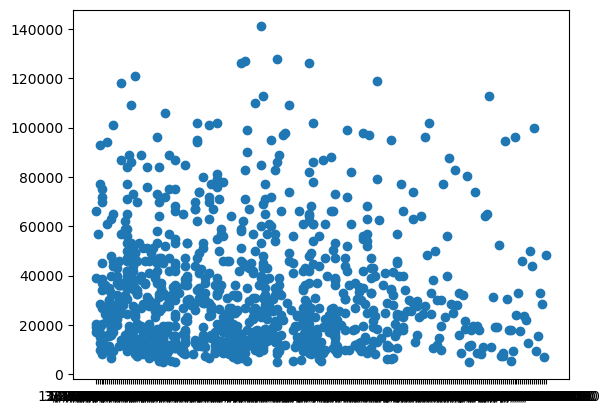

In [7]:
fig, ax = plt.subplots()

ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

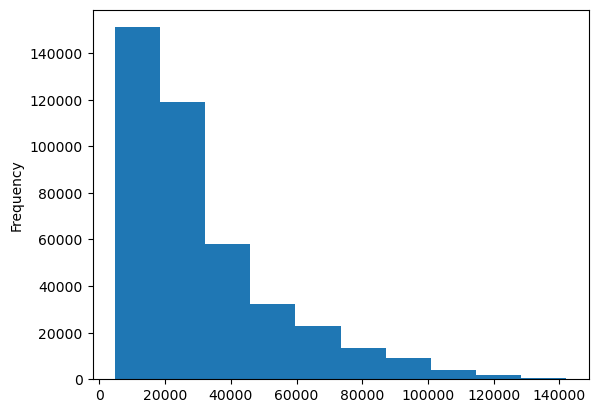

In [8]:
df.SalePrice.plot.hist();

## Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the parse_dates parameter.

In [9]:
df.saledate.dtype

dtype('O')

In [10]:
# Import data again but this time lets parse dates

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=['saledate'])

In [11]:
df.saledate.dtype

dtype('<M8[ns]')

In [12]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

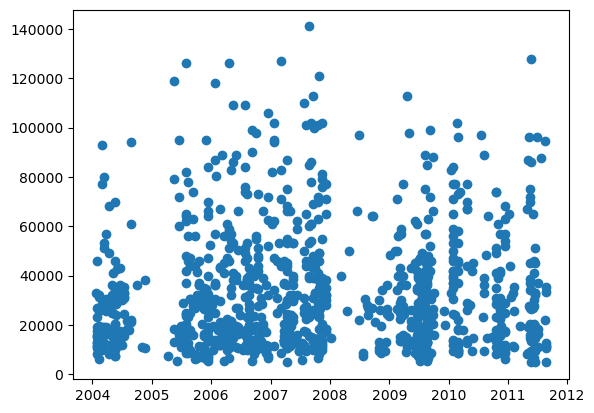

In [13]:
fig, ax = plt.subplots()

ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [14]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


## Sort DataFrame by saledate
When working with time series data, it's a good idea to sort it by date.

In [16]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Make a copy of the original DataFrame
We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [17]:
df_temp = df.copy()

### Add datetime parameters for `saledate` column

In [18]:
def feature_eng_saledate(df_temp):
    df_temp['saleYear'] = df_temp.saledate.dt.year
    df_temp['saleMonth'] = df_temp.saledate.dt.month
    df_temp['saleDay'] = df_temp.saledate.dt.day
    df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
    df_temp['saleDayOfYear'] = df_temp.saledate.dt.dayofyear

feature_eng_saledate(df_temp)

df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [19]:
# Now we've enriched our DataFrame with date time features, we can remove 'saledate'

df_temp.drop('saledate', axis=1, inplace=True)

In [20]:
# Check the values of sales in differnt states
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

## Modelling

We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1, random_state=42)

X_train, y_train = df_temp.drop('SalePrice', axis=1), df_temp['SalePrice']

model.fit(X_train,y_train)

ValueError: could not convert string to float: 'Low'

In [22]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [23]:
# If you dont know what df.items() does, here's an example
random_dict = {"key1": "hello",
               "key2": "world!"}

for key, value in random_dict.items():
    print(f"this is a key: {key}",
          f"this is a value: {value}")

this is a key: key1 this is a value: hello
this is a key: key2 this is a value: world!


In [100]:
def convert_and_save(df_temp):
    for label, content in df_temp.items():
        if pd.api.types.is_string_dtype(content):
            df_temp[label] = content.astype("category").cat.as_ordered()

    # Save the converted data frame
    df_temp.to_csv("data/bluebook-for-bulldozers/converted_to_num.csv", index = False)
    return df_temp

In [49]:
df_temp_2 = convert_and_save(df_temp)            
df_temp_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [50]:
# check what percentage of data is missing from each attribute
df_temp_2.isnull().sum()/len(df_temp_2) * 100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

In [51]:
def missing_data(obj):
    for label,content in obj.items():
        # Check for which numeric columns have null values
        if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
            print("numeric", label)
        elif pd.api.types.is_categorical_dtype and pd.isnull(content).sum():
            print("categorical", label)

missing_data(df_temp_2)

numeric auctioneerID
numeric MachineHoursCurrentMeter
categorical UsageBand
categorical fiSecondaryDesc
categorical fiModelSeries
categorical fiModelDescriptor
categorical ProductSize
categorical Drive_System
categorical Enclosure
categorical Forks
categorical Pad_Type
categorical Ride_Control
categorical Stick
categorical Transmission
categorical Turbocharged
categorical Blade_Extension
categorical Blade_Width
categorical Enclosure_Type
categorical Engine_Horsepower
categorical Hydraulics
categorical Pushblock
categorical Ripper
categorical Scarifier
categorical Tip_Control
categorical Tire_Size
categorical Coupler
categorical Coupler_System
categorical Grouser_Tracks
categorical Hydraulics_Flow
categorical Track_Type
categorical Undercarriage_Pad_Width
categorical Stick_Length
categorical Thumb
categorical Pattern_Changer
categorical Grouser_Type
categorical Backhoe_Mounting
categorical Blade_Type
categorical Travel_Controls
categorical Differential_Type
categorical Steering_Controls

In [52]:
def fill_numeric_data(obj):
    for label, content in obj.items():
        # Check for which numeric columns have null values
        if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            obj[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            obj[label] = content.fillna(content.median())

fill_numeric_data(df_temp_2)

# Check if there's any null numeric values
missing_data(df_temp_2)

categorical UsageBand
categorical fiSecondaryDesc
categorical fiModelSeries
categorical fiModelDescriptor
categorical ProductSize
categorical Drive_System
categorical Enclosure
categorical Forks
categorical Pad_Type
categorical Ride_Control
categorical Stick
categorical Transmission
categorical Turbocharged
categorical Blade_Extension
categorical Blade_Width
categorical Enclosure_Type
categorical Engine_Horsepower
categorical Hydraulics
categorical Pushblock
categorical Ripper
categorical Scarifier
categorical Tip_Control
categorical Tire_Size
categorical Coupler
categorical Coupler_System
categorical Grouser_Tracks
categorical Hydraulics_Flow
categorical Track_Type
categorical Undercarriage_Pad_Width
categorical Stick_Length
categorical Thumb
categorical Pattern_Changer
categorical Grouser_Type
categorical Backhoe_Mounting
categorical Blade_Type
categorical Travel_Controls
categorical Differential_Type
categorical Steering_Controls


In [53]:
df_temp_2.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [54]:
def fill_data(obj):
    for label, content in obj.items():
        # Check for which numeric columns have null values
        if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            obj[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            obj[label] = content.fillna(content.median())

        # iterqate through all categorical rows which have or not have null values
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary column which tells us if the data was missing or not
            obj[label+"_is_missing"] = pd.isnull(content)
            # Fill missing values with the corresponding code + 1
            obj[label] = pd.Categorical(content).codes+1

# Call the function
fill_data(df_temp_2)

# Check
missing_data(df_temp_2)

In [55]:
df_temp_2.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [56]:
len(df_temp_2)

412698

In [57]:
df_temp_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


In [59]:
%%time
# Instantiate model

model = RandomForestRegressor(n_jobs=-1, random_state=42)


# Fit the model
model.fit( df_temp_2.drop("SalePrice",axis=1), df_temp_2['SalePrice'])

CPU times: user 18min 53s, sys: 2.87 s, total: 18min 55s
Wall time: 2min 34s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [59]:
df_temp_2.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int32

In [60]:
# lets create validation set through our train and valid csv imported data
df_validation_set = df_temp_2[df_temp_2.saleYear==2012]
df_training_set = df_temp_2[df_temp_2.saleYear!=2012]

len(df_training_set), len(df_validation_set)

(401125, 11573)

In [61]:
# Split data into X and y

X_train, y_train = df_training_set.drop("SalePrice",axis=1), df_training_set.SalePrice
X_valid, y_valid = df_validation_set.drop("SalePrice",axis=1), df_validation_set.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Evaluation

In [62]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds)) 

# Create function to evaluate model on few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {
        "Training MAE": mean_absolute_error(y_train,train_preds),
        "Valid MAE": mean_absolute_error(y_valid,val_preds),
        "Training RMSLE": rmsle(y_train,train_preds),
        "Valid RMSLE": rmsle(y_valid,val_preds),
        "Training R^2": r2_score(y_train,train_preds),
        "Valid R^2": r2_score(y_valid,val_preds)
    }
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [63]:
# # This takes far too long... for experimenting

# %%time
# model = RandomForestRegressor(n_jobs=-1, 
#                               random_state=42)

# model.fit(X_train, y_train)

In [64]:
# Rather than training on complete dataset we will train on subset
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

In [65]:
%%time
# We will notice this taking less time than earlier one 
model.fit(X_train,y_train)

CPU times: user 28 s, sys: 127 ms, total: 28.2 s
Wall time: 3.79 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [66]:
show_scores(model)

{'Training MAE': 5561.298809224058,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': np.float64(0.25774537825697696),
 'Valid RMSLE': np.float64(0.29362638671089003),
 'Training R^2': 0.8606658995199188,
 'Valid R^2': 0.8320374995090507}

## Hyerparameter tuning with RandomizedSearchCV

In [78]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different randomforest regressor hyperparameters
rf_grid = {
    "n_estimators": np.arange(10,100,10),
    "max_depth":[None, 3, 5, 10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2),
    "max_features": [0.5, 1, 'sqrt', 'log2'],
    "max_samples": [10000]
}

# instantiate randomizedsearchcv model
rs_model = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=42),
    param_distributions=rf_grid,
    n_iter=100,
    cv=5,
    verbose=True
)

# fit the model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 19min 45s, sys: 19.7 s, total: 20min 5s
Wall time: 4min 34s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [79]:
rs_model.best_params_

{'n_estimators': np.int64(90),
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(3),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [80]:
show_scores(rs_model)

{'Training MAE': 5844.108029199514,
 'Valid MAE': 7224.832953460367,
 'Training RMSLE': np.float64(0.2676319753635244),
 'Valid RMSLE': np.float64(0.29418669104718587),
 'Training R^2': 0.8472330423381784,
 'Valid R^2': 0.8284838523270027}

## Training model with searched best hyperparameters that i know.

In [67]:
%%time

# Most ideal Hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1, 
                                    min_samples_split=14, 
                                    max_features=0.5, 
                                    n_jobs=-1, 
                                    max_samples=None,
                                    random_state = 42)

# Fit the model
ideal_model.fit(X_train,y_train)

CPU times: user 3min 6s, sys: 382 ms, total: 3min 7s
Wall time: 26.1 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [68]:
show_scores(ideal_model)

{'Training MAE': 2953.816113716348,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': np.float64(0.14469006962371855),
 'Valid RMSLE': np.float64(0.2452416398953833),
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450093}

## Make predictions on test data

In [94]:
# Import test data
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


## Convert the test data set in to the required format of our model

In [95]:
# Modify the sale date as we did earlier to our train dataset
feature_eng_saledate(df_test)

In [96]:
# Now Drop saledate attribute
df_test.drop('saledate', axis=1, inplace=True)

In [97]:
# convert remianing non numeric types to category
convert_and_save(df_test)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,NaN,NaN,NaN,NaN,NaN,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,NaN,NaN,NaN,Standard,Conventional,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,80NX3,80,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,28N,28,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,35N,35,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,35N,35,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298


In [98]:
# fill missing values
fill_data(df_test)

missing_data(df_test)

In [99]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [84]:
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [93]:
# Arrange the colums in same order as in X_train
df_test = df_test[X_train.columns]

In [90]:
# Lets now try to make predictions
test_preds = ideal_model.predict(df_test)

In [91]:
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029], shape=(12457,))

We've made some predictions but they're not in the same format Kaggle is asking for: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation


In [92]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


## Feature Importance

In [101]:
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [103]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

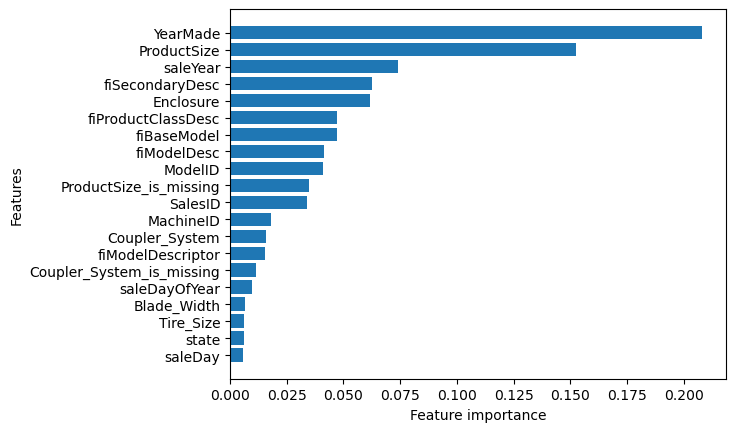

In [104]:
plot_features(X_train.columns, ideal_model.feature_importances_)